In [2]:
import os
import pandas as pd
from models import prep

pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

df = prep.load_dataset()
df = prep.split_sum_totals(df)
df = prep.feature_extraction(df)
df = prep.remove_obvious_outliers(df)

In [3]:
# forget about the time related features 
df = df.drop(columns=["id_lsf", "sinDayOfYear", "cosDayOfYear",
                      "daysSinceBaseDate"])

In [4]:
for agent in ["id_pa", "id_be"]:
    global_stats = pd.concat([
        df.groupby(agent)["importo"].median().rename(
            agent.strip("id_") + "_global_median"),
        df.groupby(agent)["importo"].std().rename(
            agent.strip("id_") + "_global_std")], axis=1)
    df = df.join(global_stats, on=agent)

# sta cosa è sostituta da median_annual_contract e med_ann_rev


In [5]:
df = df[df["cpv"].isin(prep.abc_cpv_short_names.keys())]
df = df[df["id_scelta_contraente"].isin(prep.abc_procedure_short_names.keys())]

In [6]:
# df must be local
for agent in ["id_pa", "id_be"]:
    local_stats = pd.concat([
        df.groupby(agent)["importo"].median().rename(
            agent.strip("id_") + "_local_median"),
        df.groupby(agent)["importo"].std().rename(
            agent.strip("id_") + "_local_std")], axis=1)
    df = df.join(local_stats, on=agent)

In [7]:
df[[
    "importo", "pa_local_median", "be_local_median", "pa_med_ann_contr", 
    "be_med_ann_contr", "pa_med_ann_expenditure", "be_med_ann_revenue", 
    "id_scelta_contraente", "cpv", "id_pa", "id_be"]]

,importo,pa_local_median,be_local_median,pa_med_ann_contr,be_med_ann_contr,pa_med_ann_expenditure,be_med_ann_revenue,id_scelta_contraente,cpv,id_pa,id_be
4,707.92,815.32,768.40,1.05k,888.24,101.99M,322.60k,23,33,2997,95012
13,29.15k,29.07k,107.25k,3.30k,119.38k,20.84M,3.00M,23,45,592,103976
20,128.16,5.00k,4.20k,4.50k,1.00k,197.78M,19.91k,23,33,2992,283851
22,5.00k,6.60k,1.88k,1.02k,2.07k,6.68M,821.93k,23,45,14374,94395
29,340.80k,3.60k,29.22k,4.35k,28.99k,219.52M,13.31M,1,33,2435,93140
...,...,...,...,...,...,...,...,...,...,...,...
755711,4.70k,1.12k,830.50,1.07k,576.75,93.58M,263.19k,23,33,2998,85233
755726,814.50,600.00,800.00,740.00,863.52,26.72M,393.50k,23,33,25911,89351
755727,39.00k,20.00k,1.81k,18.00k,2.32k,621.25M,464.22k,26,33,2987,94771
755738,5.00k,12.80k,1.22k,9.10k,1.80k,89.27M,85.36k,23,33,2995,93097


idea: uni-dimentional clustering within the cpv-procedures clusters

In [8]:
df["id_pa"] == 2997

4          True
13        False
20        False
22        False
29        False
          ...  
755711    False
755726    False
755727    False
755738    False
755751    False
Name: id_pa, Length: 101458, dtype: bool

<AxesSubplot:xlabel='importo', ylabel='importo'>

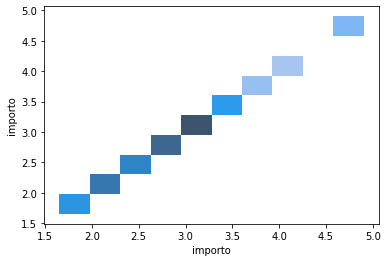

In [9]:
# where lies the lot in the (pa, be) distribution?
import seaborn as sns
import numpy as np
sns.histplot(x=np.log10(df[df["id_pa"] == 2997].importo), y=np.log10(df[df["id_be"] == 95012].importo))